## Introduction
"The **Central Limit Theorem** (CLT) establishes that, in many situations, for identically distributed independent (**i.i.d**) samples, the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions." (*from [wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)*)

In simpler words it means that no matter the distribution of the original variables, if we sample longer enough our variables and under certains assumptions, the sample's distribution will look like a normal distribution.

**But how can we see and understand what's the theorem is saying without being a mathematician ?**

This notebook is inspired by [3Blue1Brown's youtube video](https://www.youtube.com/watch?v=zeJD6dqJ5lo) and it implements, in Python, the simulations showed in the video allowing to use intuition to understand this fundamental theorem of probability theory.

Some remainders on mathematical concepts and definition will be given but you're strongly incouraged to watch the video for a better understanding.

## Rolling fair dice
Let's start with rolling a die several times since it is the easiest way to create identically distributed and independent samples and everybody should be familiar with dice and how they work.

If the die is fair, we already know that there is $\frac{1}{6th}$ chances to get one of the 6 numbers. 

Let's simulate it !

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This cell must be run only once since it moves the path one level up regardless of where we already are (it's a "cd .." command)
import os
current_path = os.getcwd()
base_path, _ = os.path.split(current_path)
os.chdir(base_path)

In [3]:
import numpy as np

from scripts.die import Die
from scripts.plots import (
    plot_rolls_distribution, 
    plot_dice_sum_distribution, 
    plot_multiple_dice_distributions,
    plot_standard_distributions
)

In [4]:
fair_die = Die()
# By default the die is fair but we can change that (and we will, later on)
# The probability for every number to be picked is 1/6 ~= 0.166 (16%)
print("die's weights:")
print(fair_die.weights)
print("")
# The cumulative probabilities are useful to extract a number from a die by randomly extracting a number between 0 and 1.
# Notice that for a fair die the intervals have the same lenght, e.g. :
# if random is between 0 and 0.16, then it's a 1
# if random is between 0.16 and 0.33, then it's a 2
# ...
# if random is between 0.833 and 0.999, then it's a 6
print("corresponding cumulative probabilities:")
print(fair_die.cumulative_probs)

die's weights:
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]

corresponding cumulative probabilities:
[0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]


In [5]:
# Let's roll the die 100k times
n_rolls = 100000
results = fair_die.roll(n_rolls=n_rolls)
print(f"Results for the first 10 rolls: ", results[:10])

Results for the first 10 rolls:  [5, 3, 5, 6, 1, 1, 5, 3, 2, 4]


mu =  3.49779
std =  1.7108930755310223


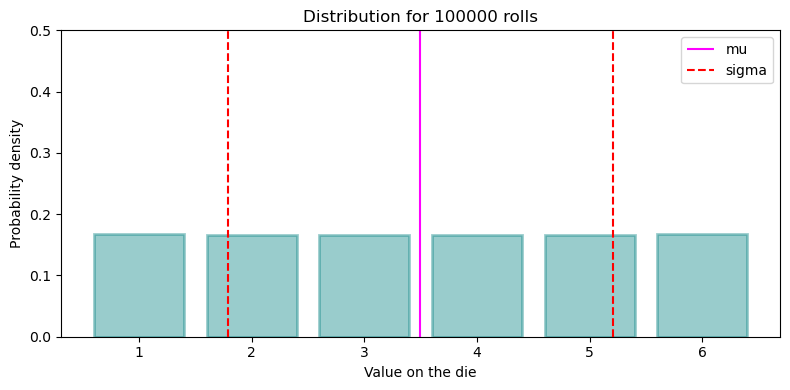

In [6]:
# And plot the results distribution by binning the 100k values we obtained, count them for each bin, and renormalize the counts in order to have a Probability density on the y-axis
plot_rolls_distribution(results, density=True)

We clearly see that for a large number of rolls we end up with a flat distribution for a fair die in which each number has a probability of $\frac{1}{6th} \simeq 0.16$ (16 %) to be obtained, as expected.

We also calculated the **mean** and the **standard deviation** of the distribution which will be useful later on.

**Remainder :**

The mean or center of mass of the distribution is the [expected value](https://en.wikipedia.org/wiki/Expected_value) of our random variable, $x$,  which is calculated by taking the probability of every possible outcome and multiply it by the value of the variable:
$$
\mu = E(X) = \sum_{x} P(X=x)*x
$$

For a fair die (and a sufficiently large number of rolls) the mean is obviously ~3.5 .

The [standard deviation](https://en.wikipedia.org/wiki/Deviation_(statistics)) is a way to measure how spread the distribution is around the mean and it's defined as:
$$
\sigma = \sqrt{Var(X)} = \sqrt{E(X-\mu)^2} = \sqrt{\sum_{x} P(X=x)*(x-\mu)^2}
$$

## Rolling multiple fair dice

Let's see now what happens if we rolls multiple dice and we store the results, i.e. the sum of all numbers appearing on the top of the dice.

### Two dice

To start let's consider only 2 fair dice that we roll many times and everytime we store the result

In [7]:
# Let's roll 2 dice 100k times
results = fair_die.roll(n_rolls=100000, n_dice=2)
print(f"First 10 results: ", results[:10])

First 10 results:  [7, 10, 11, 7, 9, 9, 4, 9, 5, 5]


mu =  7.00575
std =  2.4236495079734612


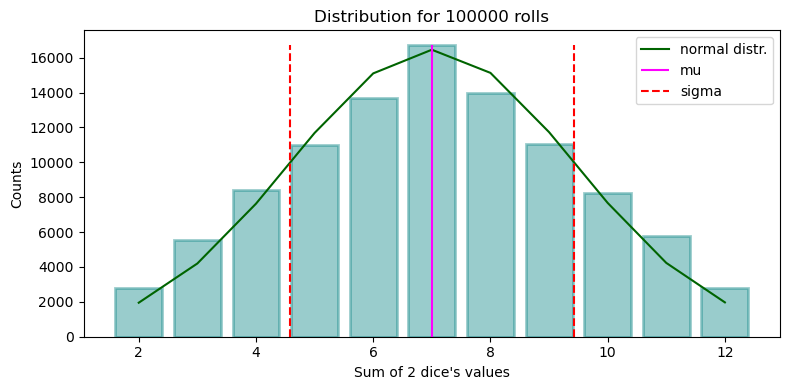

In [8]:
# And plot the results distribution
plot_dice_sum_distribution(results, n_dice=2, density=False)

We clearly see that the sum of two dice distribution for 10k rolls takes the shape of a normal distribution with $\mu \simeq 7$ which is indeed the most probable outcome when you roll 2 dice.

By setting `density=True` we can see the normalized version of the plot which is directly connected to the probabilities

mu =  7.00575
std =  2.4236495079734612


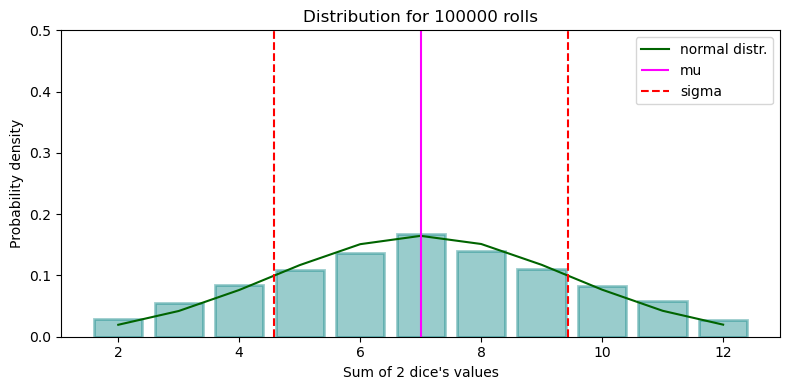

In [9]:
# Plot the normalized distribution
plot_dice_sum_distribution(results, n_dice=2, density=True)

In [10]:
label, counts = np.unique(results, return_counts=True)
print("outcome and corresponding probability :")
for i, lab in np.ndenumerate(label):
    norm_counts = counts[i] / np.sum(counts)
    print(f"P({lab}) = {norm_counts} ({round(norm_counts*100, 2)} %)")

outcome and corresponding probability :
P(2) = 0.02822 (2.82 %)
P(3) = 0.05572 (5.57 %)
P(4) = 0.08394 (8.39 %)
P(5) = 0.10969 (10.97 %)
P(6) = 0.13716 (13.72 %)
P(7) = 0.16735 (16.74 %)
P(8) = 0.13955 (13.96 %)
P(9) = 0.11033 (11.03 %)
P(10) = 0.08236 (8.24 %)
P(11) = 0.0576 (5.76 %)
P(12) = 0.02808 (2.81 %)


**Explanation :**

When we roll two dice we have 36 possible combinations. This number comes from the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):
$$
\left(\frac{n}{k}\right) = \frac{n!}{k!(n-k)!}
$$

In our simple case, for one die, we have 6 possible combination (duh):
$$
\left(\frac{6}{1}\right) = \frac{6!}{1!(6-1)!} = 6
$$

And therefore for 2 dice we have 36 possible combinations:
$$
\left(\frac{6}{1}\right)*\left(\frac{6}{1}\right) = 6*6 = 36
$$

The only way to obtain a `2` is by rolling `1` on both dice. There is therefore only one way out of the 36 possible combinations to get that result meaning that the probability of having `2` with 2 dice is $1/36 \simeq 0.027$ (2.7 %).
The same applys for a `12` since the only way to obtain it is with a double `6`.

Similarly, to obtain a `3` we have two ways: `1` on the first die and `2` on the second die or viceversa. The probability is therefore $2/36 \simeq 0.055$ (5.7 %).

Following a similar reasoning, you can convince yourself that `7` is the most probable outcome with a probability of $6/36 \simeq 0.166$ (16.6 %).

## More dice !

What happens when we increase the number of dice we roll at once ? Let's see

In [11]:
# Let's roll 100k times 2 dice, then 4, 8 and 16 dice and save the results in a list
n_dice_list = [2, 4, 8, 16]
mult_dice_results = []
for n_dice in n_dice_list:
    mult_dice_results.append(fair_die.roll(n_rolls=100000, n_dice=n_dice))

print(len(mult_dice_results))

4


n_dice =  2
mu =  7.01028
std =  2.411131336447685
----
n_dice =  4
mu =  13.99447
std =  3.417575078780274
----
n_dice =  8
mu =  28.03065
std =  4.813407377056299
----
n_dice =  16
mu =  55.97555
std =  6.827331264667037
----


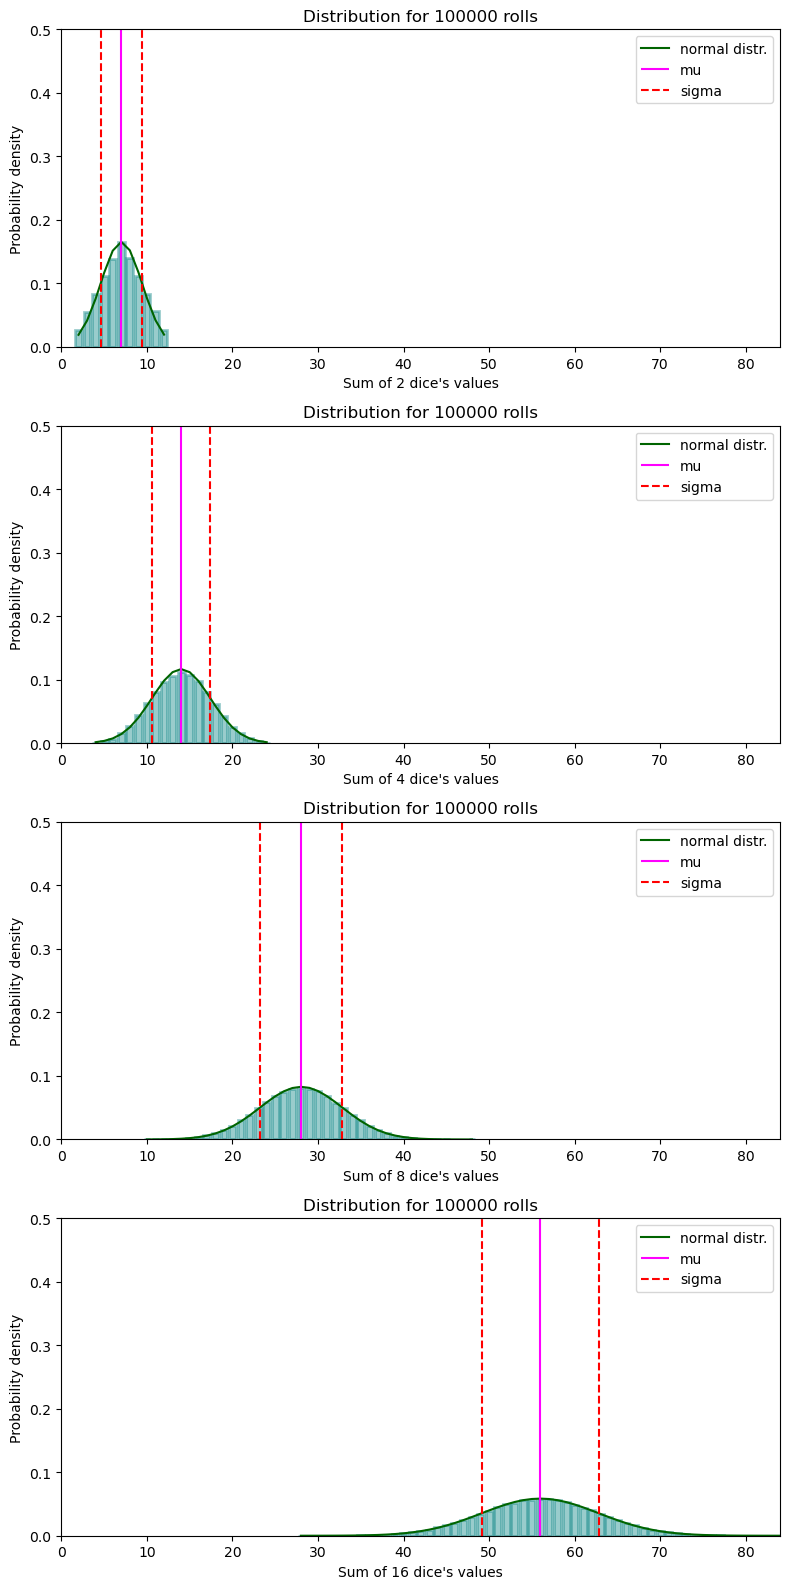

In [12]:
# And plot the distributions together and on the same scale
plot_multiple_dice_distributions(mult_dice_results, n_dice_list, density=True)

**Explaination :**

The first thing we notice is that as the number of dice increase, the **mean** also increases which makes perfect sense since if we add more dice we end up with bigger numbers.

However, we notice that the mean for 4 dice is twice the mean for 2 dice and the mean for 8 dice is twice the mean for 4 dice (or 4 times the mean for 2 dice). That's beacause the normal distribution is a [stable distribution](https://en.wikipedia.org/wiki/Stable_distribution) meaning that if $X_1$ and $X_2$ are two independent normal variables (in our case the sum for 2 dice) with means $\mu_1, \mu_2$ (in our case $\mu = 7$), then their sum $X_1 + X_2$ will also be normally distributed with mean $\mu_1 + \mu_2$ (in our case, for 4 dice, $\mu + \mu = 2\mu = 14$)

We also notice that the standard deviation is also increasing. As for the mean, in the case of a stable distribution the sum of two distribution with variance $Var(X_1)$ and $Var(X_2)$ produce a distribution with variance $Var(X_1 + X_2) = Var(X_1) + Var(X_2)$.

Recalling that $Var(X) = \sigma_X^2$ that means:
$$
\sigma_{X_1+X_2}^2 = \sigma_{X_1}^2 + \sigma_{X_2}^2
$$
In our case when we double the number of dice we are doubling the same variance and therefore for $n$ dice we have:
$$
\sigma_{X_1+...+X_n}^2 = n\sigma_{X_1}^2
$$
meaning that the standard deviation scale as $\sqrt{n}$:
$$
\sigma_{X_1+...+X_n} = \sqrt{n}\sigma_{X_1}
$$

In the plots we clearly see that. 

If our reference standard deviation for 2 dice is $\sigma_2 \simeq 2.4$, the standard deviation for 4 dice is $\sigma_4 = \sqrt{2}\sigma_2 \simeq 3.4$ and for 8 dice $\sigma_8 = \sqrt{4}\sigma_2 \simeq 4.8$ and so on.

We can now standardize the distributions so that their mean is zero, $\mu = 0$, and standard deviation is one, $\sigma=1$ using the simple [formula](https://en.wikipedia.org/wiki/Standard_normal_table):

$$
Z = \dfrac{X - \mu}{\sigma}
$$

This will allow to better compare the shape of the distributions with respect to a standard normal distribution

n_dice =  2
mu (0) =  8.284928298962768e-17
std (1) =  1.0
----
n_dice =  4
mu (0) =  8.15347789284715e-17
std (1) =  1.0
----
n_dice =  8
mu (0) =  -2.415845301584341e-16
std (1) =  1.0
----
n_dice =  16
mu (0) =  2.325606374142808e-16
std (1) =  1.0
----


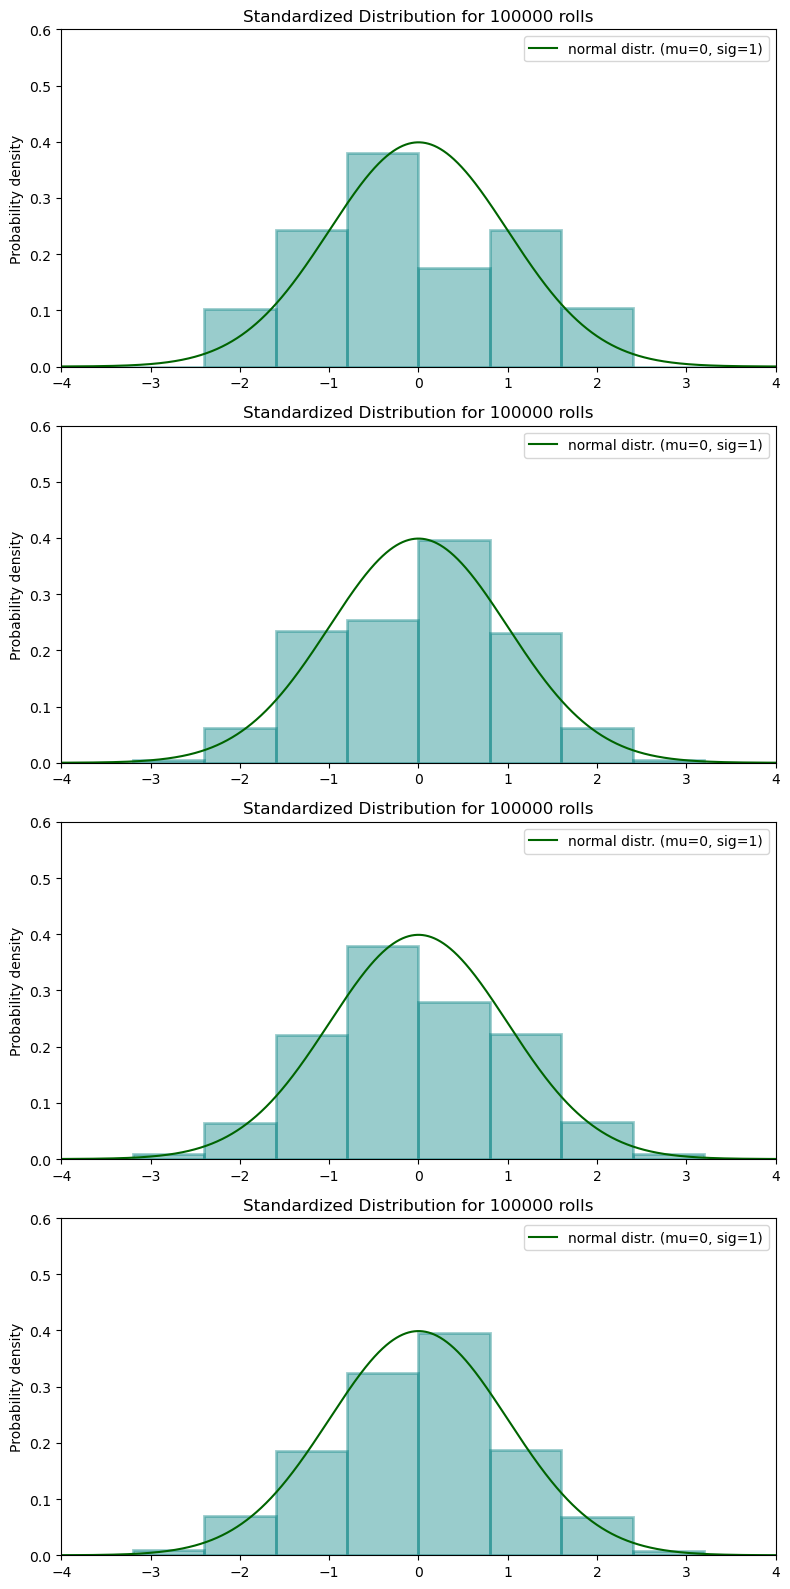

In [13]:
# Let's plot the standardized normal distributions for different number of dice
plot_standard_distributions(mult_dice_results, n_dice_list)

The distributions look like a normal distribution and as the number of dice increase, the more it looks like it.

## Rolling weighted dice

The central limit theorem states that the standardized sample tends towards the standard normal distribution regardless of the original variables distributions. We have already seen that with fair dice having a flat distribution of $1/6th$ for every value.

Let's further confirm the theorem by playing with weighted dice !

### Low die

Let's consider first a die weighted in such a way that lower values are more likely to be picked

In [14]:
low_weights = [0.4, 0.25, 0.15, 0.1, 0.07, 0.03]
low_die = Die(low_weights)
# By default the die is fair but we can change that (and we will, later on)
# The probability for every number to be picked is 1/6 ~= 0.166 (16%)
print("die's weights:")
print(low_die.weights)
print("")
print("corresponding cumulative probabilities:")
print(low_die.cumulative_probs)

die's weights:
[0.4, 0.25, 0.15, 0.1, 0.07, 0.03]

corresponding cumulative probabilities:
[0.4, 0.65, 0.8, 0.9, 0.97, 1.0]


mu =  2.281
std =  1.410084749226088


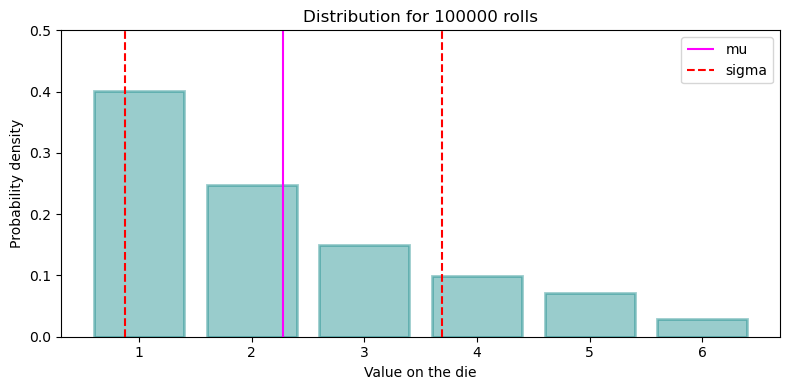

In [15]:
# Let's roll the die 100k times
n_rolls = 100000
results = low_die.roll(n_rolls=n_rolls)
# And plot the resulting distribution as a Probability density
plot_rolls_distribution(results, density=True)

4
n_dice =  2
mu =  4.56638
std =  1.9977171210158862
----
n_dice =  4
mu =  9.1172
std =  2.8172831167633827
----
n_dice =  8
mu =  18.24146
std =  3.975180130308562
----
n_dice =  16
mu =  36.47471
std =  5.620065872914658
----


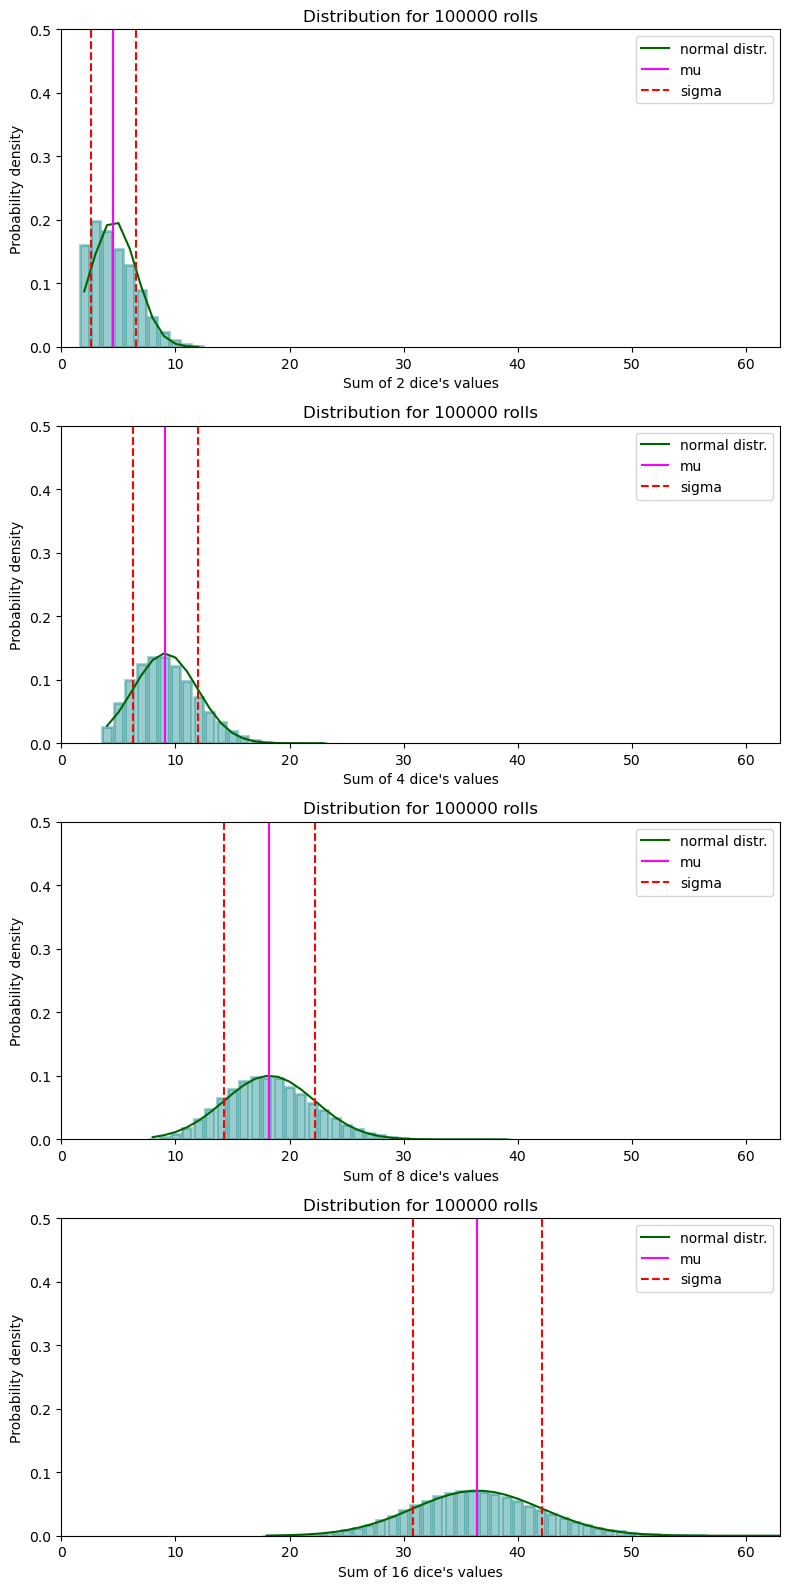

In [16]:
# Let's now roll 100k times 2 dice, then 4, 8 and 16 dice and save the results in a list
n_dice_list = [2, 4, 8, 16]
mult_dice_results = []
for n_dice in n_dice_list:
    mult_dice_results.append(low_die.roll(n_rolls=100000, n_dice=n_dice))

print(len(mult_dice_results))
# And plot the distributions together and on the same scale
plot_multiple_dice_distributions(mult_dice_results, n_dice_list, density=True)

n_dice =  2
mu (0) =  1.55893076225766e-16
std (1) =  0.9999999999999999
----
n_dice =  4
mu (0) =  -1.5567991340503794e-16
std (1) =  1.0
----
n_dice =  8
mu (0) =  -4.241940132487798e-17
std (1) =  1.0
----
n_dice =  16
mu (0) =  -3.1075586548467984e-16
std (1) =  1.0
----


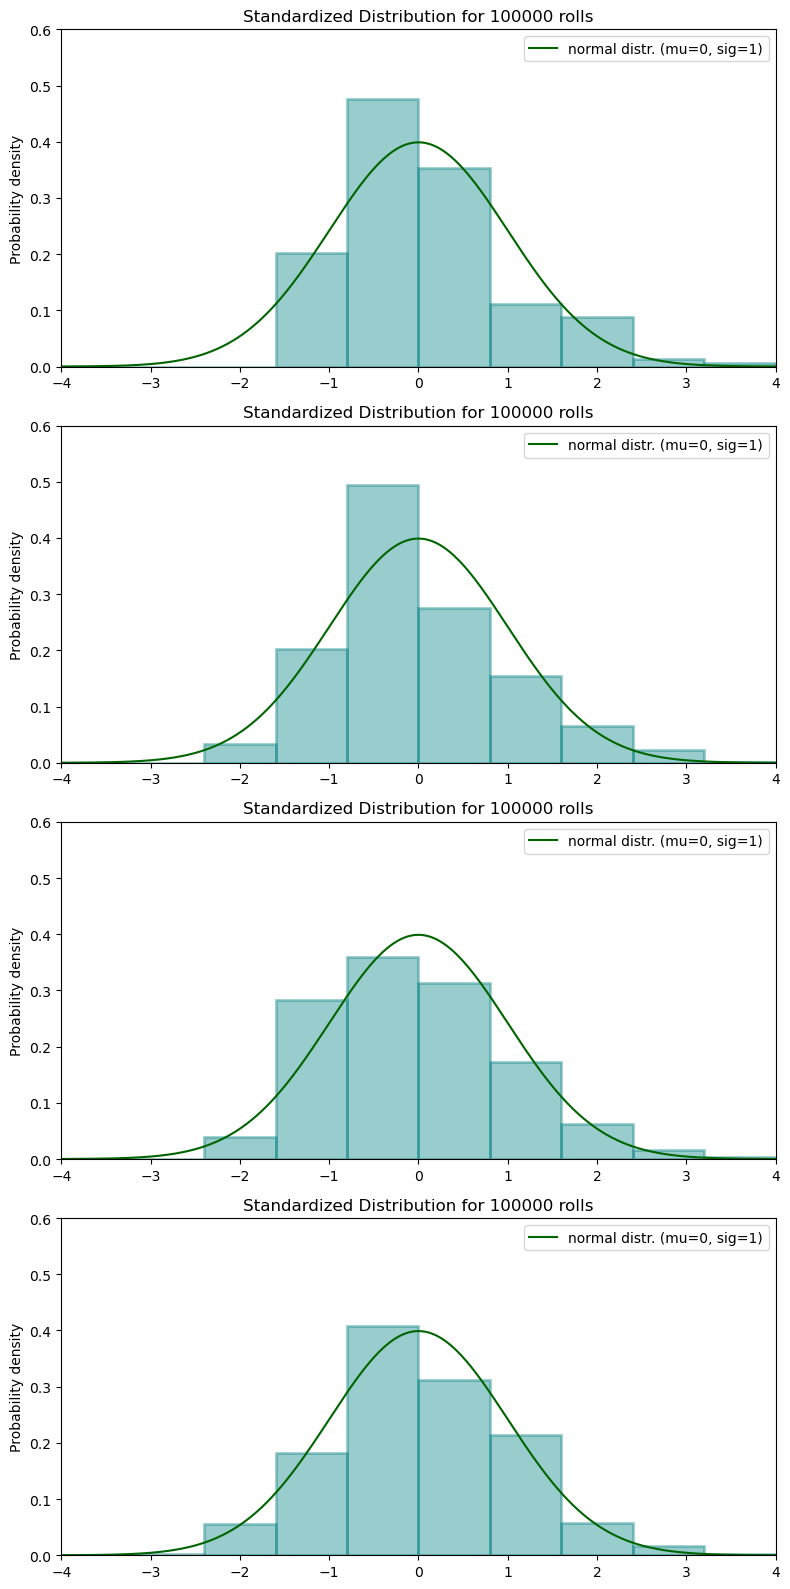

In [17]:
# Let's plot the standardized normal distributions for different number of dice
plot_standard_distributions(mult_dice_results, n_dice_list)

Once again, the distributions take the shape of a normal distribution and as the number of dice increase, the closer to a standard normal distribution they look

### Horned die

Let's make a final example with a symmetrical-spikey-distribution for our weighted die favouring the extraction of `1` and `6`

In [18]:
horned_weights = [0.4, 0.07, 0.03, 0.03, 0.07, 0.4]
horned_die = Die(horned_weights)
# By default the die is fair but we can change that (and we will, later on)
# The probability for every number to be picked is 1/6 ~= 0.166 (16%)
print("die's weights:")
print(horned_die.weights)
print("")
print("corresponding cumulative probabilities:")
print(horned_die.cumulative_probs)

die's weights:
[0.4, 0.07, 0.03, 0.03, 0.07, 0.4]

corresponding cumulative probabilities:
[0.4, 0.47000000000000003, 0.5, 0.53, 0.6000000000000001, 1.0]


mu =  3.49558
std =  2.310086678806663


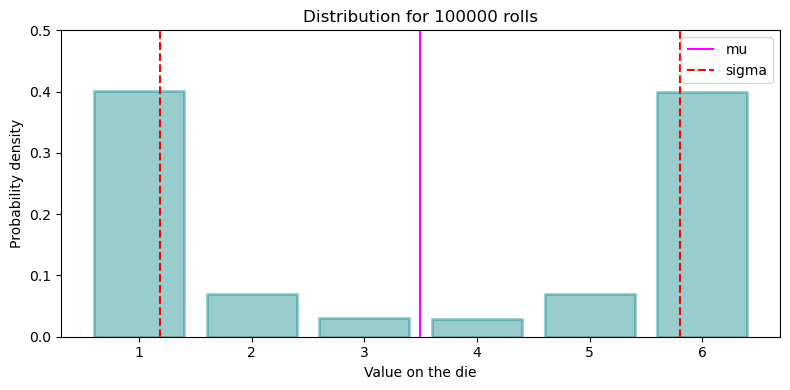

In [19]:
# Let's roll the die 100k times
n_rolls = 100000
results = horned_die.roll(n_rolls=n_rolls)
# And plot the outcomes distribution
plot_rolls_distribution(results, density=True)

4
n_dice =  2
mu =  6.98077
std =  3.2747000178795003
----
n_dice =  4
mu =  13.99952
std =  4.621077771429517
----
n_dice =  8
mu =  28.01256
std =  6.537536404977031
----
n_dice =  16
mu =  55.97633
std =  9.247413137256277
----


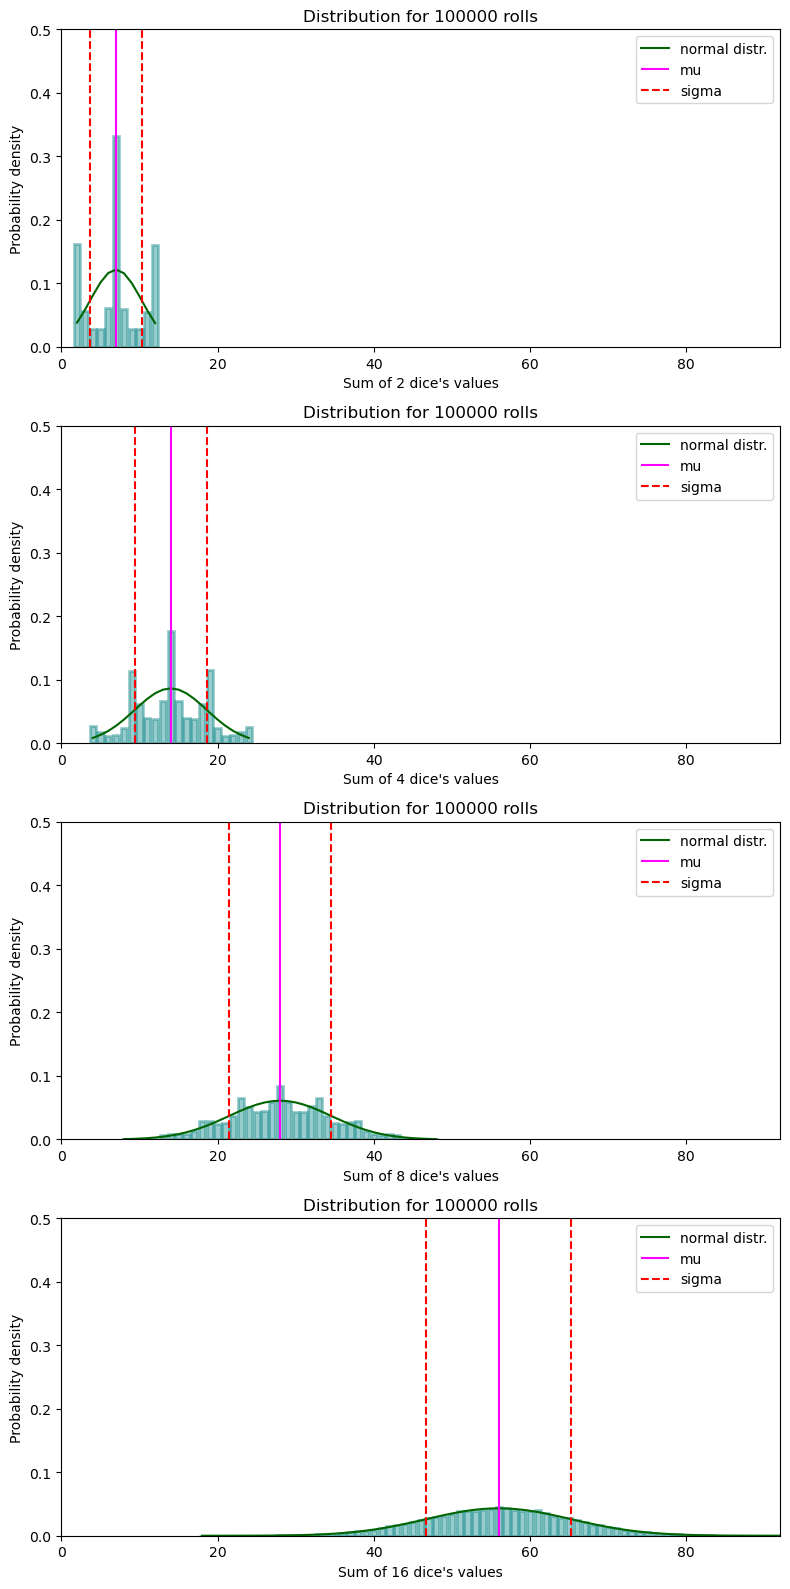

In [20]:
# Let's now roll 100k times 2 dice, then 4, 8 and 16 dice and save the results in a list
n_dice_list = [2, 4, 8, 16]
mult_dice_results = []
for n_dice in n_dice_list:
    mult_dice_results.append(horned_die.roll(n_rolls=100000, n_dice=n_dice))

print(len(mult_dice_results))
# And plot the distributions together and on the same scale
plot_multiple_dice_distributions(mult_dice_results, n_dice_list, density=True)

n_dice =  2
mu (0) =  7.069900220812997e-17
std (1) =  1.0
----
n_dice =  4
mu (0) =  -9.805489753489382e-17
std (1) =  1.0
----
n_dice =  8
mu (0) =  -1.0007994433181011e-16
std (1) =  0.9999999999999999
----
n_dice =  16
mu (0) =  2.7050361950387014e-16
std (1) =  1.0
----


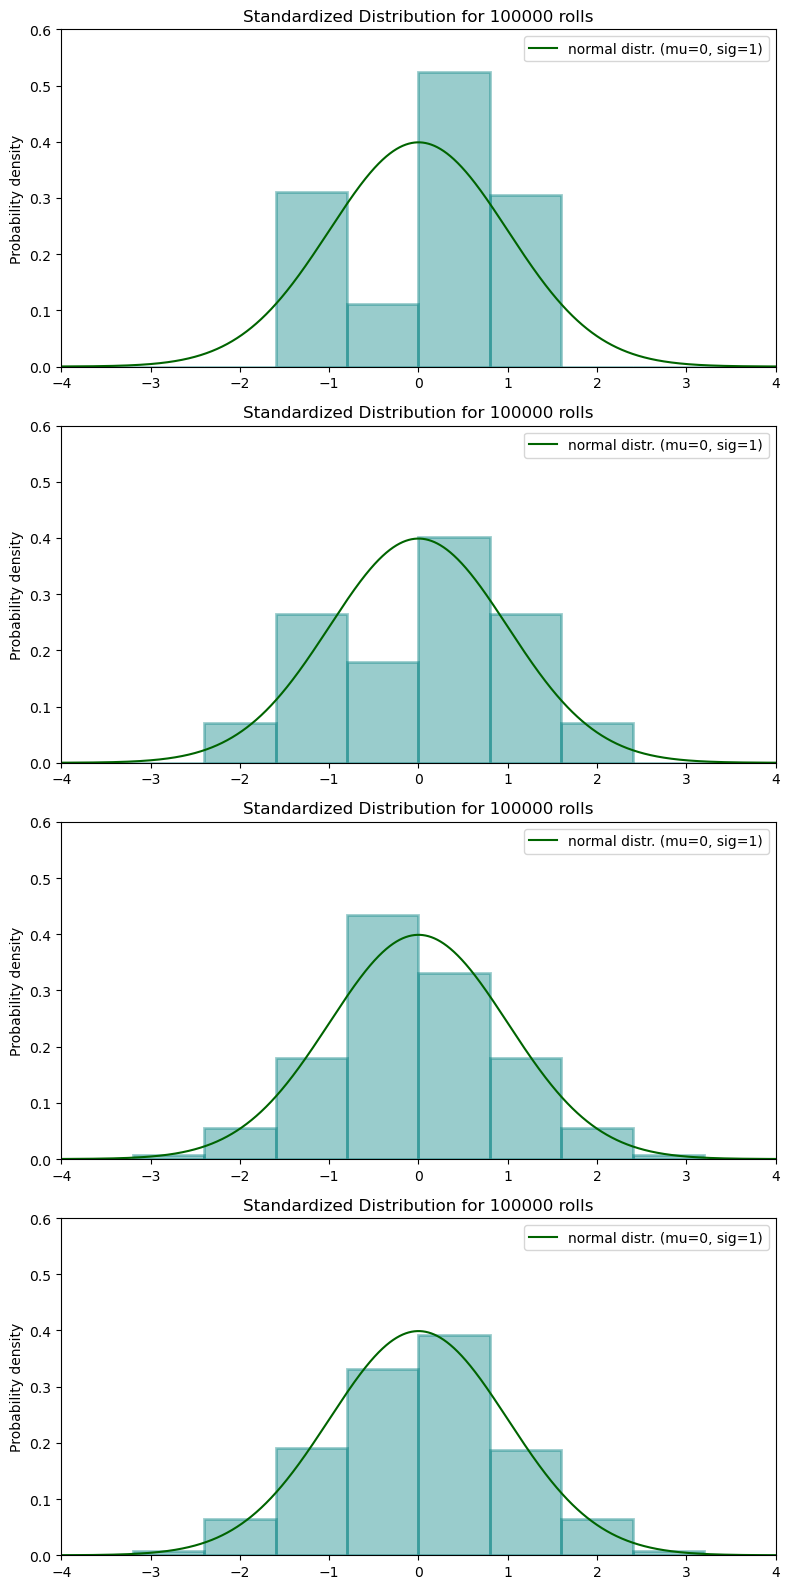

In [21]:
# Let's plot the standardized normal distributions for different number of dice
plot_standard_distributions(mult_dice_results, n_dice_list)

Even starting with a weird horned distribution for the weighted die, as the number of dice increase we converge towards a standard normal distribution.